In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!python --version

In [4]:
#!pip list

In [5]:
from gensim.models import KeyedVectors
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
import pycaret
import numpy as np
import pandas as pd
#For Classification
from pycaret.classification import *

pd.options.display.max_colwidth = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/train_clean_20000.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/test_clean_4000.csv')
data = df_train.append(df_test, ignore_index=True)
data 

,label,title+review_clean,title+review_clean_list
0,1,stun even nongamer sound track beautiful paint senery mind well would recomend even people hate vid game music play game chrono cross game ever play best music back away crude keyboarding take fresher step grate guitars soulful orchestras would impress anyone care listen _,"['stun', 'even', 'nongamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'care', 'listen', '_']"
1,1,best soundtrack ever anything read lot review say best game soundtrack figure id write review disagree bite opinino yasunori mitsudas ultimate masterpiece music timeless listen years beauty simply refuse fadethe price tag pretty stagger must say go buy cd much money one feel would worth every penny,"['best', 'soundtrack', 'ever', 'anything', 'read', 'lot', 'review', 'say', 'best', 'game', 'soundtrack', 'figure', 'id', 'write', 'review', 'disagree', 'bite', 'opinino', 'yasunori', 'mitsudas', 'ultimate', 'masterpiece', 'music', 'timeless', 'listen', 'years', 'beauty', 'simply', 'refuse', 'fadethe', 'price', 'tag', 'pretty', 'stagger', 'must', 'say', 'go', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'every', 'penny']"
2,1,amaze soundtrack favorite music time hand intense sadness prisoners fate mean play game hope distant promise girl steal star important inspiration personally throughout teen years higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb wellthis soundtrack amaze music probably best composers work not hear xenogears soundtrack cannot say sure even never play game would worth twice price buy iti wish could give star,"['amaze', 'soundtrack', 'favorite', 'music', 'time', 'hand', 'intense', 'sadness', 'prisoners', 'fate', 'mean', 'play', 'game', 'hope', 'distant', 'promise', 'girl', 'steal', 'star', 'important', 'inspiration', 'personally', 'throughout', 'teen', 'years', 'higher', 'energy', 'track', 'like', 'chrono', 'cross', 'time', 'scar', 'time', 'dreamwatch', 'chronomantique', 'indefinably', 'remeniscent', 'chrono', 'trigger', 'absolutely', 'superb', 'wellthis', 'soundtrack', 'amaze', 'music', 'probably', 'best', 'composers', 'work', 'not', 'hear', 'xenogears', 'soundtrack', 'can', 'not', 'say', 'sure', 'even', 'never', 'play', 'game', 'would', 'worth', 'twice', 'price', 'buy', 'iti', 'wish', 'could', 'give', 'star']"
3,1,excellent soundtrack truly like soundtrack enjoy video game music play game music enjoy truly relax peacefulon disk one favorites scar time life death forest illusion fortress ancient dragons lose fragment drown valleydisk two draggons galdorb home chronomantique prisoners fate gale girlfriend like zelbessdisk three best three garden god chronopolis fat jellyfish sea burn orphange dragons prayer tower star dragon god radical dreamers unstealable jeweloverall excellent soundtrack bring like video game musicxander cross,"['excellent', 'soundtrack', 'truly', 'like', 'soundtrack', 'enjoy', 'video', 'game', 'music', 'play', 'game', 'music', 'enjoy', 'truly', 'relax', 'peacefulon', 'disk', 'one', 'favorites', 'scar', 'time', 'life', 'death', 'forest', 'illusion', 'fortress', 'ancient', 'dragons', 'lose', 'fragment', 'drown', 'valleydisk', 'two', 'draggons', 'galdorb', 'home', 'chronomantique', 'prisoners', 'fate', 'gale', 'girlfriend', 'like', 'zelbessdisk', 'three', 'best', 'three', 'garden', 'god', 'chronopolis', 'fat', 'jellyfish', 'sea', 'burn', 'orphange', 'dragons', 'prayer', 'tower', 'star', 'dragon', 'god', 'radical', 'dreamers', 'unstealable', 'jeweloverall', 'excellent', 'soundtrack', 'bring', 'like', 'video', 'game', 'musicxander', 'cross']"
4,1,remember pull jaw floo

In [7]:
#different word embeddings

#fasttext_crawl_300 = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/CapstoneModels/crawl-300d-2M.vec')
#fasttext_wiki_300 = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/CapstoneModels/wiki-news-300d-1M.vec')
#glove_6B_300 = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/CapstoneModels/glove.6B.300d.txt', binary=False, no_header=True)#,limit=500000) 
glove_42B_300 = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/CapstoneModels/glove.42B.300d.txt', binary=False, no_header=True)#,limit=500000)

word_embed = glove_42B_300
n = 300

In [8]:
df_train['title+review_clean_list'] = df_train['title+review_clean'].apply(word_tokenize)
df_test['title+review_clean_list'] = df_test['title+review_clean'].apply(word_tokenize)

In [9]:
def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in model.key_to_index]
    if len(words) >= 1:
        return np.mean(model[words], axis=0)
    else:
        return []

In [10]:
df_train['mean_vector'] = df_train['title+review_clean_list'].apply(lambda x: get_mean_vector(word_embed, x))
df_test['mean_vector'] = df_test['title+review_clean_list'].apply(lambda x: get_mean_vector(word_embed, x))

In [11]:
X_train = np.vstack(df_train['mean_vector'])
X_test = np.vstack(df_test['mean_vector'])
df_train_word_embed = pd.DataFrame(X_train)
df_test_word_embed = pd.DataFrame(X_test)

df_train_word_embed['label'] = df_train['label']
df_test_word_embed['label'] = df_test['label']

In [12]:
s = setup(df_train_word_embed, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(20000, 301)"
4,Transformed data shape,"(20000, 301)"
5,Transformed train set shape,"(14000, 301)"
6,Transformed test set shape,"(6000, 301)"
7,Numeric features,300
8,Preprocess,True
9,Imputation type,simple


In [13]:
top_3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8456,0.9183,0.8469,0.8514,0.8491,0.6911,0.6913,1.9140
ridge,Ridge Classifier,0.8431,0.0000,0.8405,0.8517,0.8459,0.6861,0.6864,0.2420
lda,Linear Discriminant Analysis,0.8421,0.9154,0.8401,0.8503,0.8450,0.6840,0.6843,1.9100
lightgbm,Light Gradient Boosting Machine,0.8331,0.9100,0.8345,0.8393,0.8368,0.6660,0.6662,8.7810
svm,SVM - Linear Kernel,0.8304,0.0000,0.8318,0.8439,0.8328,0.6607,0.6688,0.7000
xgboost,Extreme Gradient Boosting,0.8296,0.9093,0.8348,0.8334,0.8340,0.6589,0.6591,92.1990
gbc,Gradient Boosting Classifier,0.8183,0.8963,0.8173,0.8267,0.8218,0.6364,0.6368,129.5550
et,Extra Trees Classifier,0.8014,0.8806,0.8004,0.8102,0.8051,0.6026,0.6029,5.7220
rf,Random Forest Classifier,0.8012,0.8811,0.8084,0.8049,0.8066,0.6021,0.6022,21.1400
ada,Ada Boost Classifier,0.7812,0.8612,0.7834,0.7887,0.7860,0.5622,0.5623,25.7070


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [14]:
top_3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

In [15]:
pred = [predict_model(i, data=df_test_word_embed) for i in top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8378,0.9179,0.8433,0.8405,0.8419,0.6753,0.6753


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8360,0.8360,0.8365,0.8423,0.8394,0.6719,0.6719


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8370,0.9154,0.8375,0.8432,0.8404,0.6739,0.6739


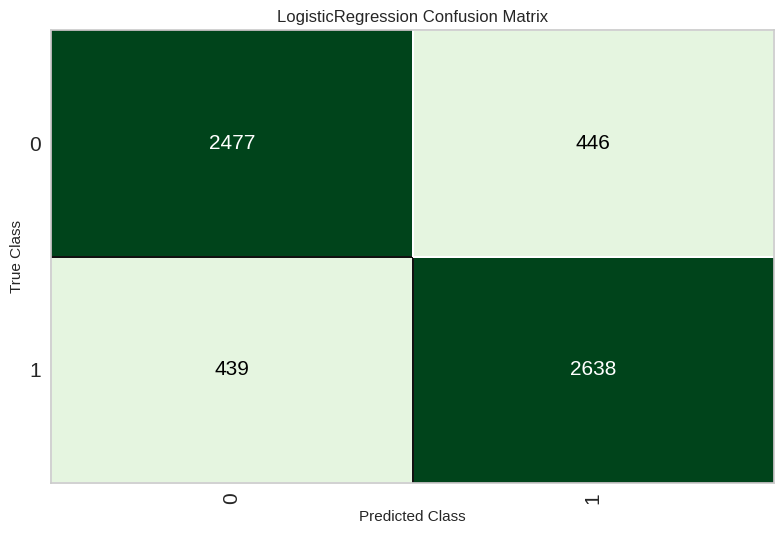

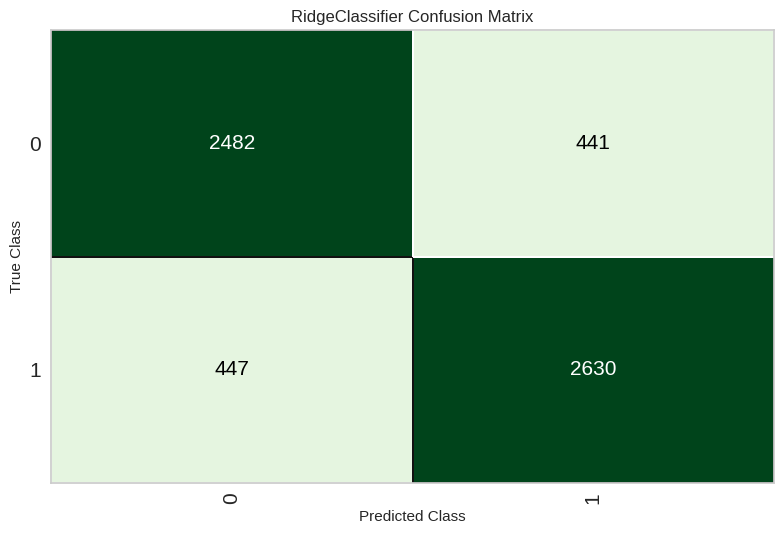

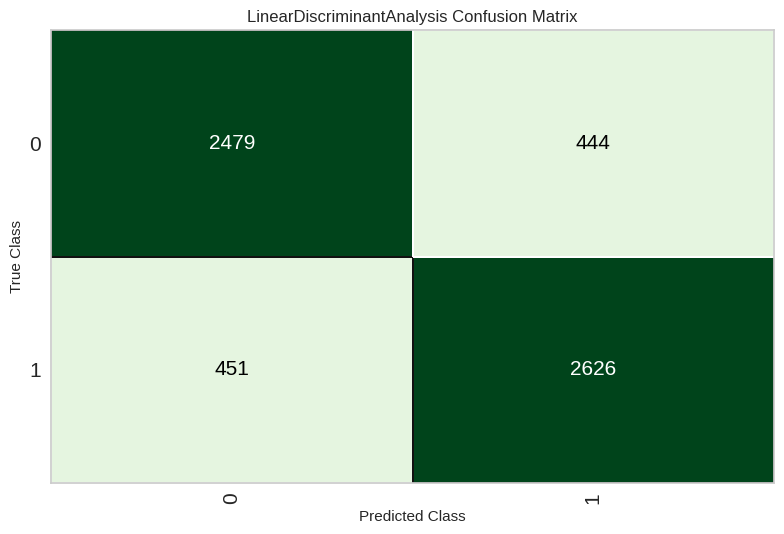

[None, None, None]

In [16]:
# plot confusion matrix
[plot_model(i, plot = 'confusion_matrix') for i in top_3]

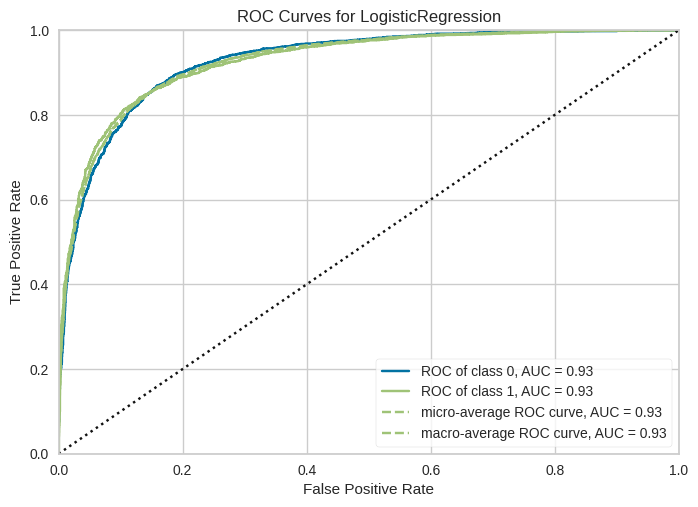

TypeError: ignored

In [17]:
# plot auc
[plot_model(i, plot = 'auc') for i in top_3]

In [18]:
tuned_top_3 = [tune_model(i) for i in top_3] 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8443,0.9148,0.8162,0.8720,0.8432,0.6889,0.6904
1,0.8564,0.9252,0.8691,0.8536,0.8613,0.7125,0.7127
2,0.8414,0.9127,0.8273,0.8584,0.8426,0.6830,0.6834
3,0.8600,0.9267,0.8691,0.8595,0.8643,0.7197,0.7198
4,0.8421,0.9175,0.8315,0.8565,0.8438,0.6843,0.6846
5,0.8371,0.9171,0.8398,0.8422,0.8410,0.6741,0.6741
6,0.8357,0.9083,0.8259,0.8496,0.8376,0.6715,0.6717
7,0.8493,0.9254,0.8412,0.8616,0.8513,0.6986,0.6988
8,0.8421,0.9157,0.8357,0.8535,0.8445,0.6843,0.6844


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8357,0.0000,0.8078,0.8631,0.8345,0.6718,0.6732
1,0.8550,0.0000,0.8733,0.8484,0.8607,0.7096,0.7099
2,0.8457,0.0000,0.8384,0.8575,0.8479,0.6914,0.6916
3,0.8614,0.0000,0.8705,0.8609,0.8657,0.7226,0.7226
4,0.8421,0.0000,0.8301,0.8576,0.8436,0.6843,0.6847
5,0.8329,0.0000,0.8343,0.8389,0.8366,0.6655,0.6656
6,0.8350,0.0000,0.8245,0.8494,0.8367,0.6700,0.6703
7,0.8464,0.0000,0.8440,0.8547,0.8493,0.6928,0.6928
8,0.8357,0.0000,0.8259,0.8496,0.8376,0.6715,0.6717


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8407,0.9132,0.8120,0.8689,0.8395,0.6818,0.6833
1,0.8550,0.9236,0.8719,0.8494,0.8605,0.7096,0.7099
2,0.8393,0.9095,0.8301,0.8526,0.8412,0.6786,0.6788
3,0.8614,0.9245,0.8760,0.8569,0.8664,0.7225,0.7227
4,0.8386,0.9161,0.8301,0.8514,0.8406,0.6771,0.6774
5,0.8321,0.9138,0.8370,0.8359,0.8365,0.6641,0.6641
6,0.8350,0.9064,0.8259,0.8484,0.8370,0.6700,0.6703
7,0.8457,0.9229,0.8440,0.8535,0.8487,0.6913,0.6914
8,0.8350,0.9129,0.8259,0.8484,0.8370,0.6700,0.6703


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
tuned_top_3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=0.01, solver='eigen',
                            store_covariance=False, tol=0.0001)]

In [20]:
tuned_pred = [predict_model(i, data=df_test_word_embed) for i in tuned_top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8378,0.9179,0.8433,0.8405,0.8419,0.6753,0.6753


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8380,0.8380,0.8370,0.8452,0.8411,0.6759,0.6759


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8355,0.9159,0.8350,0.8424,0.8387,0.6709,0.6709


In [21]:
save_model(top_3[0], 'glove_42B_300_top1')
save_model(top_3[1], 'glove_42B_300_top2')
save_model(top_3[2], 'glove_42B_300_top3')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

In [22]:
load_model('glove_42B_300_top1')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feat...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)